# Customer churn prediction with machine learning

## importing

In [1]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay,mean_absolute_error,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np

In [2]:
import joblib
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

In [3]:
#modeling imports
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

- Reading data with pandas

In [4]:
df = pd.read_csv("data/Bank Customer Churn Prediction.csv")

In [5]:
df.to_parquet("BankCustomerChurn.parquet")

# Bank customer churn

In [6]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


1. **customer_id:** Represents the customer identification number. Typically, it's a unique customer identifier
1. **credit_score:** Represents the customer's credit score. The credit score is a measure that evaluates a customer's credit history and financial status. Higher credit scores generally indicate a better credit history
1. **country:** Represents the country where the customer resides. It is a categorical variable indicating the customer's geographical location
1. **gender:** Represents the customer's gender. It can take categorical values such as "Male" or "Female."
1. **age:** Represents the customer's age. It is typically expressed as a numerical value.
1. **tenure:** Represents the duration of the customer's relationshi with the bank. Usually measured in months or years.
1. **balance:** Represents the customer's account balance. It's a numerical value and usually shows the current amount of money in the account.
1. **products_number:** Represents the number of products the customer has. For example, if the customer has a credit card, a savings account, and a deposit account, this value could be 3.
1. **credit_card:** Represents whether the customer has a credit card or not. It's a binary variable where 1 indicates having a credit card, and 0 indicates not having one.
1. **active_member:**Represents whether the customer is an active member or not. It's a binary variable where 1 indicates being an active member, and 0 indicates not being an active member.
1. estimated salary: Represents the customer's estimated salary. It's a numerical value and usually represents the annual earned income.
1. **churn:** Represents the churn status of the customer. It's a binary variable where 1 indicates that the customer has churned (left), and 0 indicates that the customer is still active.

### getting some insights form dataframe

In [7]:
df.describe([.25,.50,.75,.99,])

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
99%,1.581311e+07,850.000000,72.000000,10.000000,185967.985400,3.000000,1.00000,1.000000,198069.734500,1.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


> Customers tend to stay with the bank for an average of 5 years.

> There is a wide range of account balances, indicating varying financial statuses among customers.

> The majority of customers have 2 or fewer products, and around 70% have a credit card.

>About half of the customers are active members.



In [8]:
# creating numeric columns
num = [col for col in df if df[col].dtype in ["int","float"]]
num

['customer_id',
 'credit_score',
 'age',
 'tenure',
 'balance',
 'products_number',
 'credit_card',
 'active_member',
 'estimated_salary',
 'churn']

### Distrubiton for each column

In [9]:
for col in num:
  print(col,df[col].mean())
  print(col,df[col].median())

customer_id 15690940.5694
customer_id 15690738.0
credit_score 650.5288
credit_score 652.0
age 38.9218
age 37.0
tenure 5.0128
tenure 5.0
balance 76485.889288
balance 97198.54000000001
products_number 1.5302
products_number 1.0
credit_card 0.7055
credit_card 1.0
active_member 0.5151
active_member 1.0
estimated_salary 100090.239881
estimated_salary 100193.915
churn 0.2037
churn 0.0


-  The dataset exhibits skewness in the age distribution, particularly with a potential skew towards higher ages, with a maximum age of 99.
- Additionally, the mean and median values of the account balance feature might indicate skewness, possibly influenced by a significant number of zero values.
- This observation suggests a concentration of customers with zero account balances, warranting further investigation into the factors contributing to this pattern.

In [10]:
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64



```
country and gender is categorical features but one of the numerical features can be categorical as well they are :tenure,products_number,credit_card,active_member
```



In [11]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

✅ Good  we have not any null value

In [12]:
df.duplicated().sum()

0

✅ We have not any duplicated rows

### Plotting categorical features

In [13]:
#import seaborn and matplotlib for using this method
def visualize_categorical(dataframe, categorical_column):
    """
    Visualizes the count distribution of a categorical column in a DataFrame using a bar plot.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame containing the data.
    - categorical_column (str): The name of the categorical column to be visualized.
    """
    plt.figure(figsize=(8, 4))
    sns.countplot(x=categorical_column, data=dataframe,palette="Set2",hue=categorical_column,legend=False)
    plt.title(f'{categorical_column} - Count')
    plt.xlabel(categorical_column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

- visualizaiton categoical columns to understand data

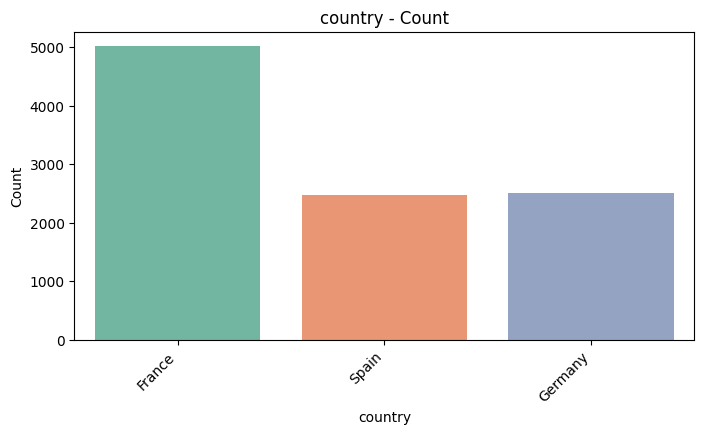

In [14]:
visualize_categorical(df,"country")

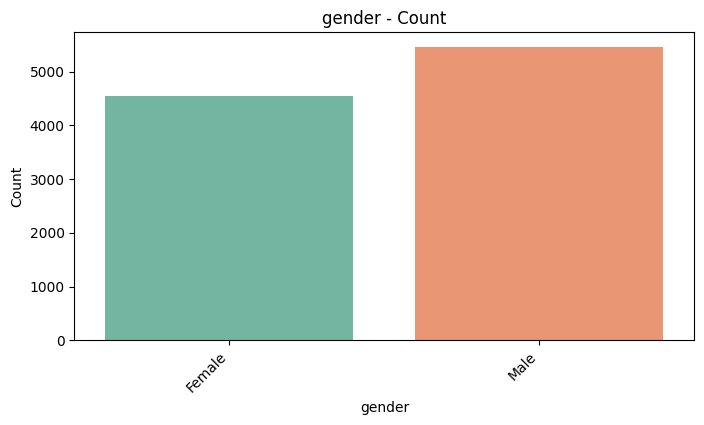

In [15]:
visualize_categorical(df,"gender")

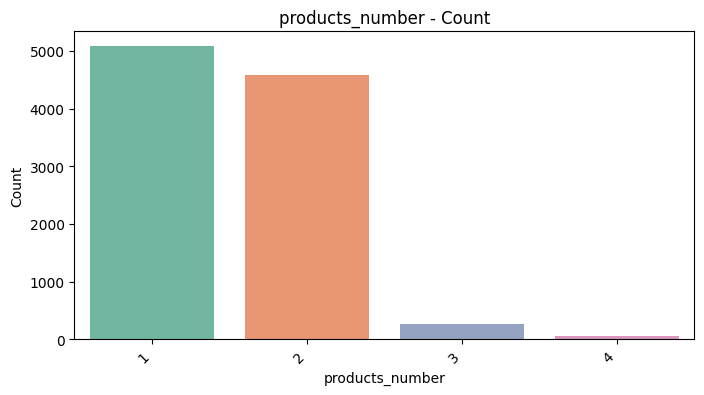

In [16]:
visualize_categorical(df,"products_number")

- Customers commonly use product numbers 1 and 2.
- The number of customers in France is higher compared to other countries.

### plotting numerical feature

In [17]:
def visualize_numeric_column(dataframe, numeric_column):
    """
    Visualizes the distribution of a numerical column in a DataFrame using a histogram.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame containing the data.
    - numeric_column (str): The name of the numerical column to be visualized.

    """
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 4))
    sns.histplot(dataframe[numeric_column], bins=20, kde=True)
    plt.title(f'{numeric_column} - Distribution')
    plt.xlabel(numeric_column)
    plt.ylabel('Frequency')
    plt.show()

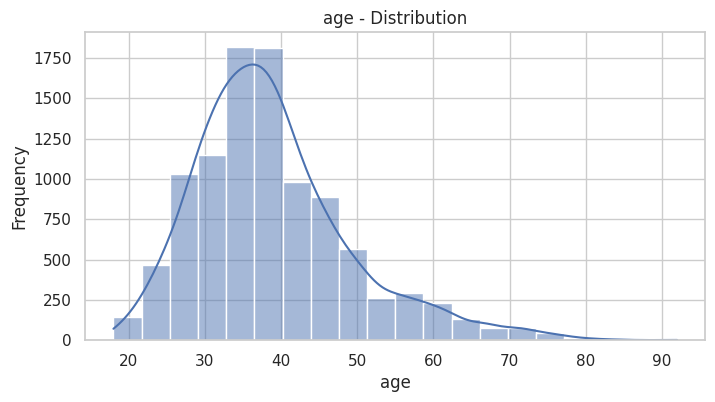

In [18]:
#visualizing age feature
visualize_numeric_column(df,"age")

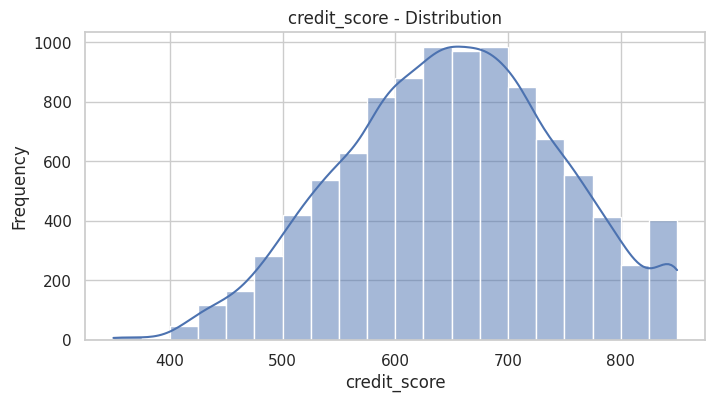

In [19]:
#visualizaiton cretdit score feature
visualize_numeric_column(df,"credit_score")

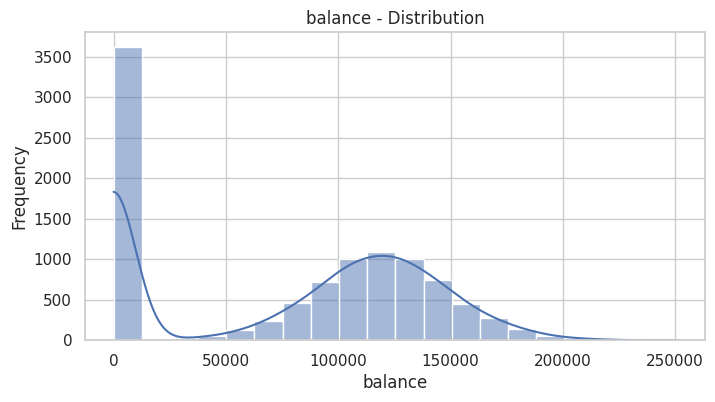

In [20]:
#visualization balance feature
visualize_numeric_column(df,"balance")

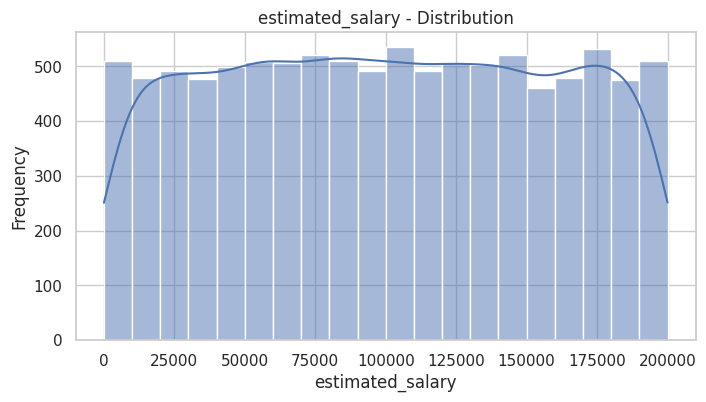

In [21]:
#visualization estimated salary feature
visualize_numeric_column(df,"estimated_salary")

- The distribution of estimated salary appears to follow a normal distribution.
- The presence of numerous zero values in the balance column might indicate
potential churn among customers.
- Age data is right-skewed, which could be attributed to the presence of outlier values.

In [22]:
import joblib

### plotting relationship for features by specific feature

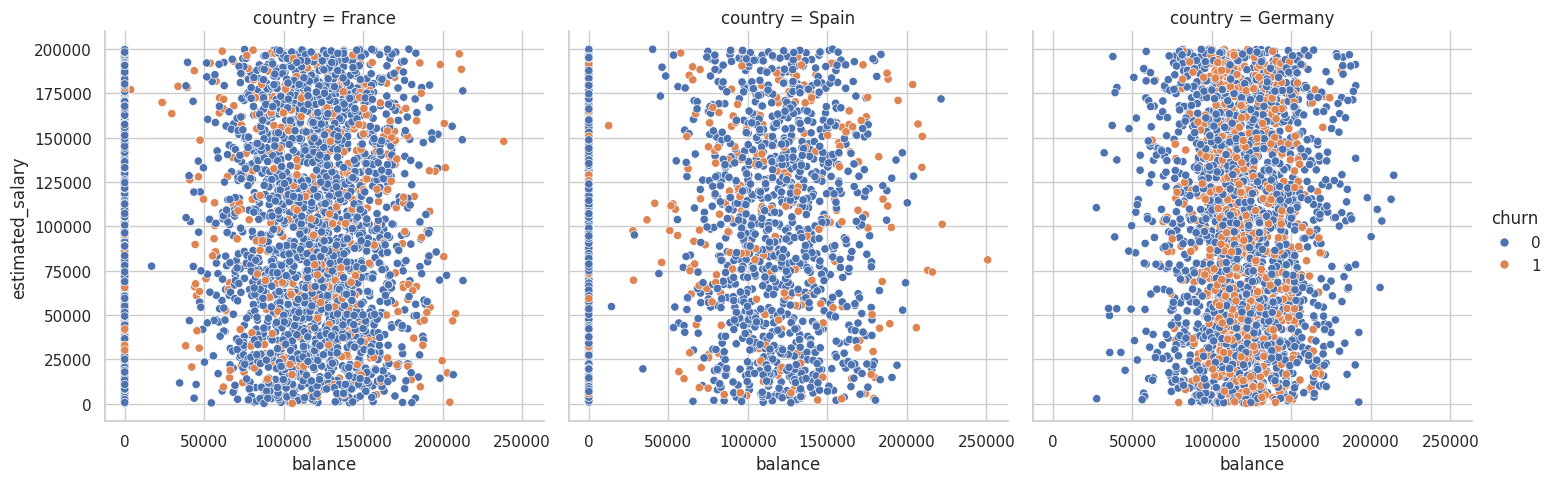

In [23]:
def visualize_scatter_by_column(dataframe,xcol,ycoll,search_col,hue):
  """
  Visualization of relationships between columns by specific column
  parameters
   - dataframe (pd.DataFrame): The DataFrame containing the data.
   - xcol (str): The name of the x numerical column to be visualized.
   - ycoll (str): The name of the y numerical column to be visualized.
   - search_col (str): The name of the searching column that you want search by specific column to be visualized.
   - hue (str): The name of column that may you want to see in diffrent colors.
  """
  sns.relplot(
      data=dataframe, x=dataframe[xcol], y=dataframe[ycoll],
      col=dataframe[search_col], hue=dataframe[hue],
      kind="scatter"
  )
visualize_scatter_by_column(df,"balance","estimated_salary","country","churn")

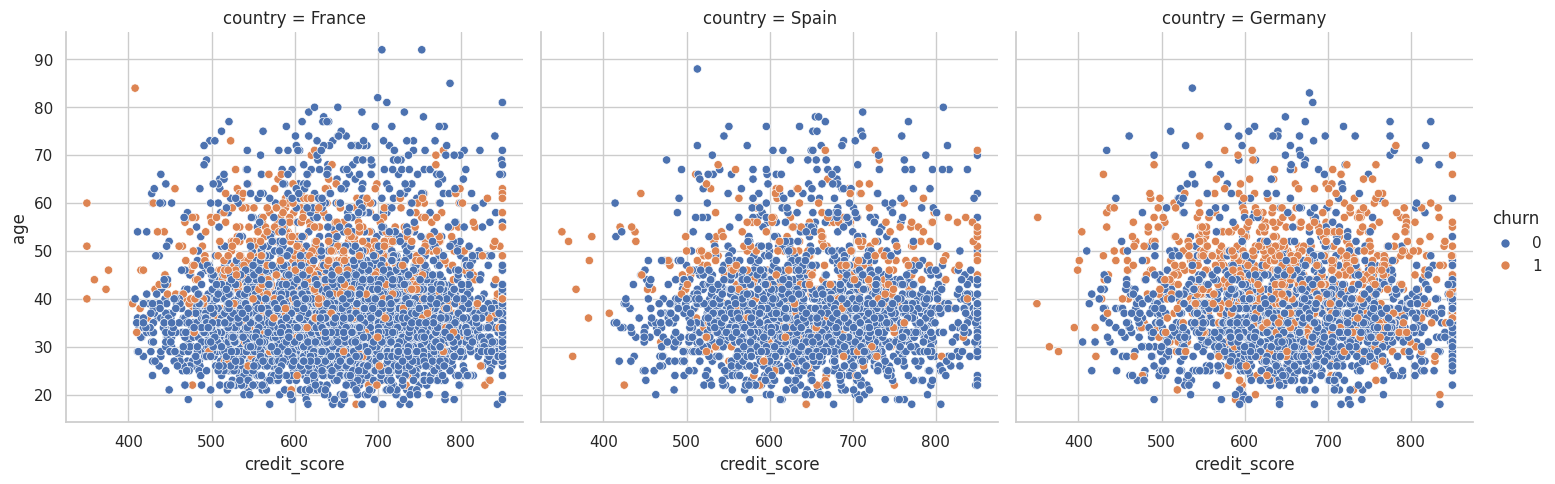

In [24]:
visualize_scatter_by_column(df,"credit_score","age","country","churn")

- When examining the correlation between credit score and age on a country basis, it is observed that there is a concentration around the age range of 40. There is a pronounced separation in the credit score between 500-700.
 -  Analyzing the distribution of bank balance and income suggests a normal distribution, but the presence of numerous zero values raises suspicions. The separation rate is most prominent in Germany, and no observation with a balance value of 0 is observed.

### plotting correlations

In [25]:
def two_column_correlation(dataframe,x,y,hue):
    """
    Show scatter plot and regression line for correlation between two column.

    Parameters:
        - dataframe (pd.DataFrame): The DataFrame containing the data.
        - x (str): The name of the x column.
        - y (str): The name of the y column:
        - hue (str):The name of the target column
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x,y=y,data=dataframe,hue=hue)
    plt.title('Scatter Plot for two columns')
    plt.grid(True)
    plt.show()

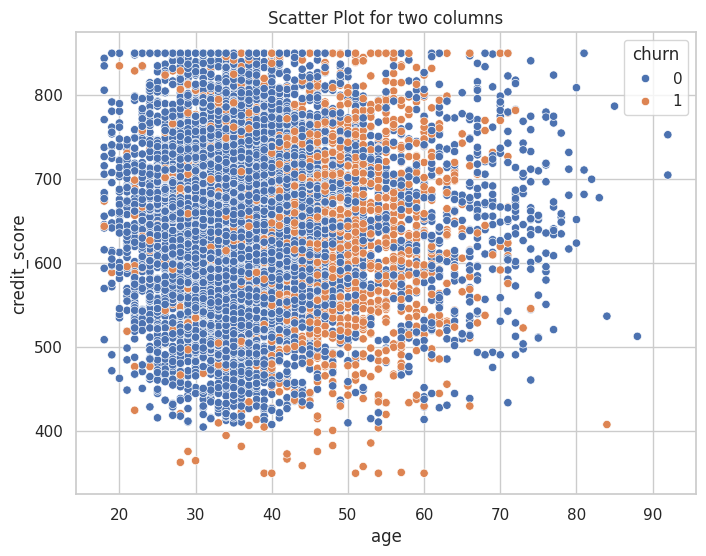

In [26]:
# calling method
two_column_correlation(df,"age","credit_score","churn")

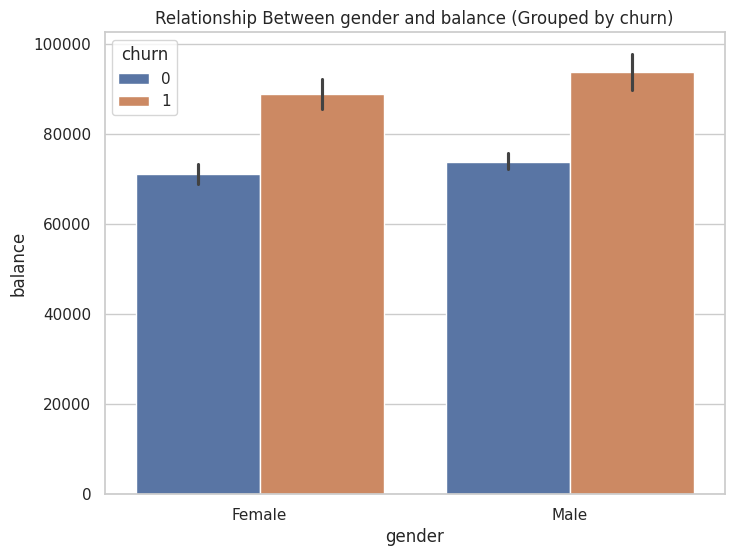

In [27]:
def plot_categorical_relationship(data, categorical_feature, numerical_feature, target_feature=None):
    """
    Draws a barplot  that shows the relationship between categorical and numerical features in the given dataframe.
    Parameters:
    - data:(pd.dataFrame), Dataframe that you can use it when you drawing that.
    - categorical_feature (str): The name of the categorical column.
    - numerical_feature (str): The name of the numerical column.
    - target_feature (str) : Target variables. Default None unless you add target variables.
    """
    fig=plt.figure(figsize=(8, 6))

    if target_feature:
        sns.barplot(x=categorical_feature, y=numerical_feature, hue=target_feature, data=data)
        plt.title(f'Relationship Between {categorical_feature} and {numerical_feature} (Grouped by {target_feature})')
    else:
        sns.barplot(x=categorical_feature, y=numerical_feature, data=data)
        plt.title(f'Relationship Between {categorical_feature} and {numerical_feature}')

    plt.show()
    fig.savefig("categorical_and_numeric")
plot_categorical_relationship(df,"gender","balance","churn")

### Heatmap

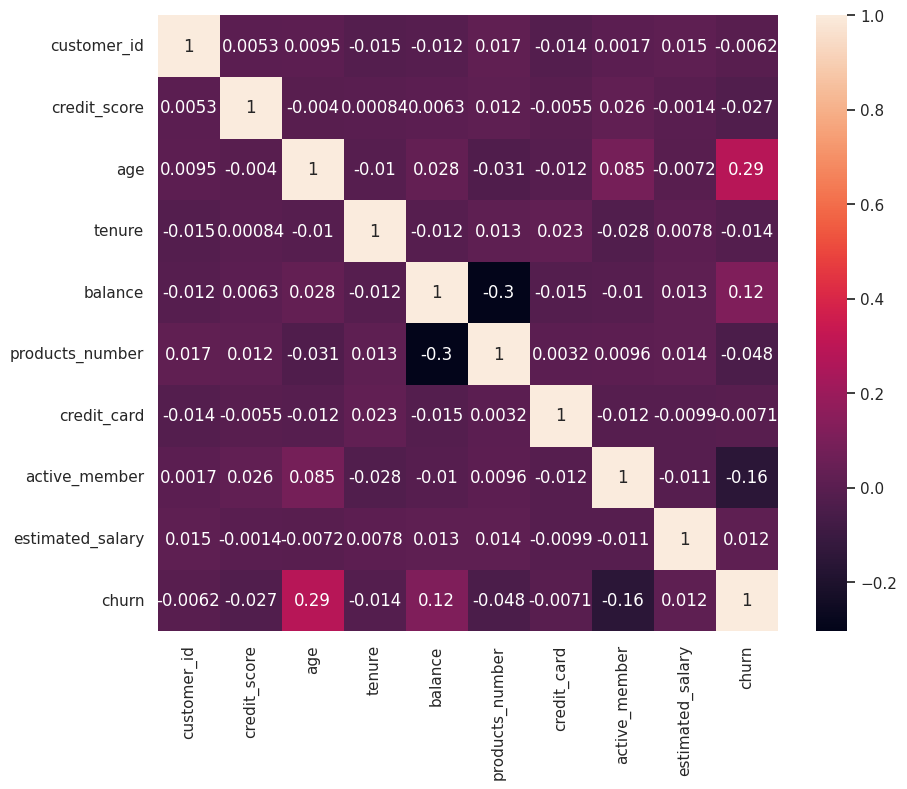

In [28]:
def heatmap():
  """
  Create heatmap understand correlations
  """
  fig = plt.figure(figsize=(10, 8))
  sns.heatmap(df.corr(), annot=True)
  fig.savefig("correlation_matrix.png")
heatmap()

age and churn are correlated
- we can use our model age feeature.

### plotting probability of churn for specific column

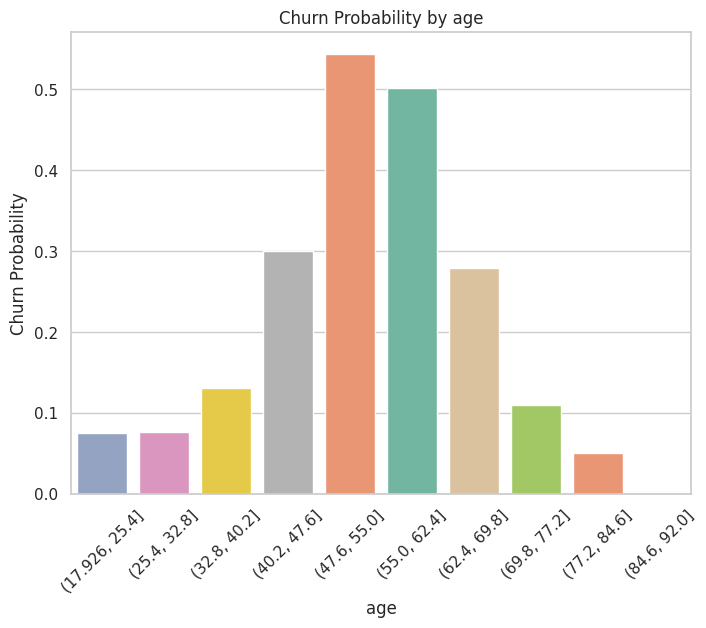

In [29]:
def churn_probability_by_column(df, numerical_column, bins=10):
    """
    Show bar plot for churn probability based on a numerical column.

    Parameters:
        - dataframe (pd.DataFrame): The DataFrame containing the data.
        - numerical_column (str): The name of the numerical column to be analyzed.
        - bins (int): Range for numerical column.

    """
    df["column_group"] = pd.cut(df[numerical_column], bins=bins)
    plt.figure(figsize=(8,6))

    churn_prob_by_column = df.groupby('column_group')['churn'].mean().reset_index()
    sns.barplot(x='column_group', y='churn', data=churn_prob_by_column,palette="Set2",hue="churn",legend =False)

    plt.title(f'Churn Probability by {numerical_column}')
    plt.xlabel(numerical_column)
    plt.ylabel('Churn Probability')
    plt.xticks(rotation=45)
    plt.show()

churn_probability_by_column(df, 'age', bins=10)

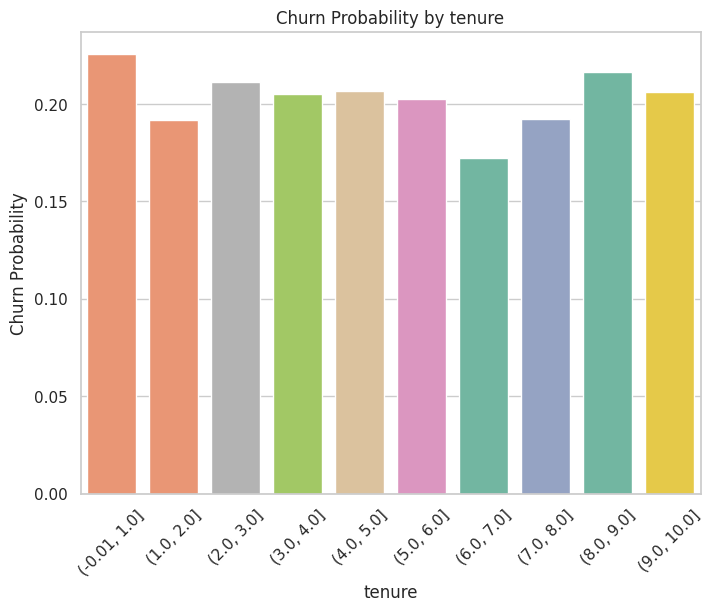

In [30]:
churn_probability_by_column(df,"tenure")

- It is observed that the age of churn increases between 47 and 62.
 - The number of years spent in the bank does not seem to have a significant impact.

In [31]:
df[:1]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,column_group
0,15634602,619,France,Female,42,2,0.0,1,1,1,101348.88,1,"(1.0, 2.0]"


In [32]:
df = df.drop("column_group",axis=1)

 Generally, as the balance amount in the account increases, the likelihood of customers leaving also tends to increase.

<Axes: xlabel='churn', ylabel='count'>

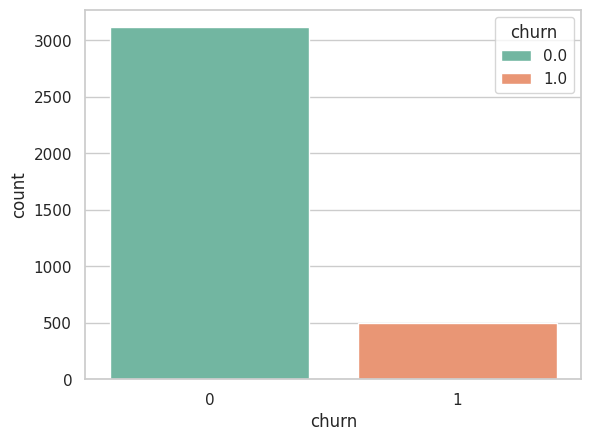

In [33]:
# searching churn impact for balnce 0
balance_0=df[df["balance"]==0]
sns.countplot(data = balance_0,x=df["churn"],palette="Set2",hue="churn")

In [34]:
#dropping unuseful column
df= df.drop("customer_id",axis=1)

### Visualization of Outliers

In [35]:
def boxplot_outliers(dataframe):
    """
    Creates horizontal boxplots for numerical columns to visualize outliers in relation to the target variable.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame containing the data.

    Returns:
    - None
    """
    plt.figure(figsize=(18, 6))

    numerical_columns = dataframe.select_dtypes(include=['int', 'float']).columns

    for i, column in enumerate(numerical_columns, 1):
        if column != 'churn':
            plt.subplot(2, len(numerical_columns)-1, i)
            sns.boxplot(x='churn', y=column, data=dataframe, showmeans=True, meanline=True, palette="Set2", hue='churn', legend=False)
            plt.title(f'{column} Outliers')

    plt.tight_layout()
    plt.show()

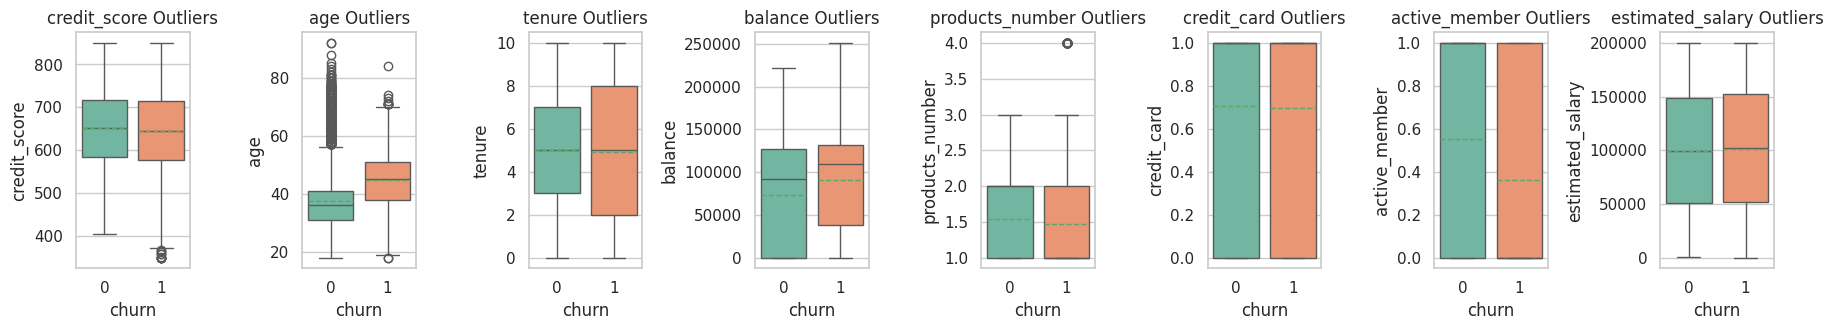

In [36]:
boxplot_outliers(df)

>There are outlier values in the age column. Previously, when we examined the histogram and describe statistics, it appeared to be right-skewed. To address this, we can perform outlier cleaning for the age variable.

### Outliers Detection

In [37]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    """
    Calculate the lower and upper limits for identifying outliers in a given column of a DataFrame.

    Parameters:
    - dataframe (pandas.DataFrame): The DataFrame containing the data.
    - col_name (str): The name of the column for which outliers are being identified.
    - q1 (float, optional): The first quartile (default is 0.25).
    - q3 (float, optional): The third quartile (default is 0.75).

    """
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [38]:
def check_outlier(dataframe, col_name, q1=0.25, q3=0.75):

    """
    Check if there are outliers in a given column of a DataFrame based on specified quartiles.

    Parameters:
    - dataframe (pandas.DataFrame): The DataFrame containing the data.
    - col_name (str): The name of the column for which outliers are being checked.
    - q1 (float, optional): The first quartile (default is 0.25).
    - q3 (float, optional): The third quartile (default is 0.75).

    Returns:
    bool: True if outliers are present, False otherwise.

    If any value in the specified column falls outside these limits,
    the function returns True, indicating the presence of outliers. Otherwise, it returns False.
    Be consider you have run outlier_thresholds function.
    """
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [39]:
check_outlier(df,"age")

True

### Removing outliers

In [40]:
def replace_with_thresholds(dataframe, variable):
    """
    Replace values in a specific column of a DataFrame with their respective lower and upper thresholds.

    Parameters:
    - dataframe (pandas.DataFrame): The DataFrame containing the data.
    - variable (str): The name of the column for which values are being replaced.

    The function calculates the lower and upper thresholds using the outlier_thresholds function.
    Values in the specified column that are below the lower threshold are replaced with the lower threshold,
    and values above the upper threshold are replaced with the upper threshold.
    """
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [41]:
replace_with_thresholds(df,"age")

In [42]:
check_outlier(df,"age")

False

Age feature have cleaned.

📊Let's visualize then.

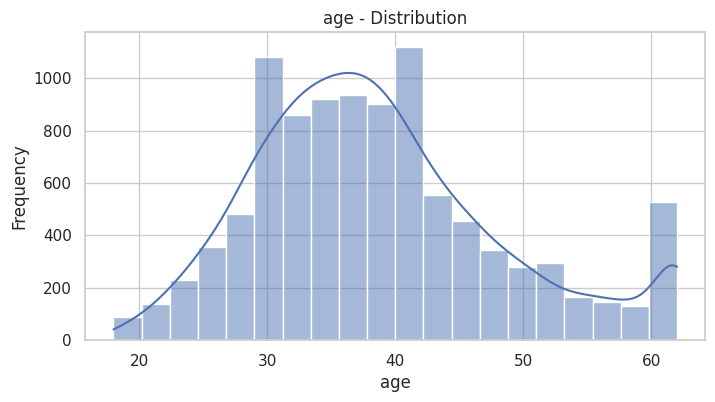

In [43]:
visualize_numeric_column(df,"age")



> After outlier removing histogram chart has normal distrubition.
Skewwness has gone.



# processing workflow

In [44]:
def data_split(dataframe):
  """
  Provided easy split data
  parameters:
  - df (pd.DataFrame):The name of the dataframe.
  """
  X=dataframe.drop("churn",axis=1)
  y=dataframe.churn
  return X,y

In [45]:
def label_encoder_method(dataframe,column):
  """
  Encode the specified column using LabelEncoder.

    Parameters:
    - dataframe (pd.DataFrame): The input DataFrame.
    - column (str): The column to be label-encoded.

  """
  X,y =data_split(dataframe)
  lbl_enc = LabelEncoder()
  X[column] = lbl_enc.fit_transform(X[column])
label_encoder_method(df,"gender")

In [46]:
def one_hot_encoder(dataframe,categoric_column,drop_first=False):

  """
  Apply one-hot encoding to the specified categorical column(s) in the DataFrame.
  - dataframe (pd.DataFrame): The input DataFrame.
  - categoric_column (str or list of str): The column(s) to be one-hot encoded.
  """
  dataframe=pd.get_dummies(data=dataframe,columns=categoric_column,drop_first=drop_first)
  return dataframe

In [47]:
# Splititng data for model
def preprocess_workflow(dataframe,encoded_column="country",one_hot_encoder_column=False,label_encoder_column=False,column="gender"):
  """
  Perform preprocessing steps on the input dataframe.

    Parameters:
    - dataframe (pd.DataFrame): The input dataframe to be processed.
    - encoded_column (str): The column to be one-hot encoded if one_hot_encoder_column is True.
    - one_hot_encoder_column (bool): Whether to perform one-hot encoding.
    - label_encoder_column (bool): Whether to perform label encoding.
    - column (str): The column to be label encoded if label_encoder_column is True.

    Returns:
    - X (pd.DataFrame): The processed features.
    - X_train (pd.DataFrame): The training set features.
    - X_test (pd.DataFrame): The testing set features.
    - y_train (pd.Series): The training set labels.
    - y_test (pd.Series): The testing set labels.
    - y (pd.Series): The original labels.

  """
  X,y = data_split(dataframe)

  if one_hot_encoder_column:
    cat=[encoded_column]
    X = one_hot_encoder(X,cat)

  if label_encoder_column:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])

  X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=818)
  return X,X_train,X_test,y_train,y_test,y
X, X_train, X_test, y_train, y_test,y = preprocess_workflow(df,one_hot_encoder_column=True,label_encoder_column=True)

🔀Let's have a quick look at shape of the new dataframe 😊

In [48]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (8000, 12)
X_test (2000, 12)
y_train (8000,)
y_test (2000,)


### creating base model

In [49]:
def random_forest_model():
    """
    Creates and trains a Random Forest model on the data.
    Before use this function be consider that you run preprocess_workflow function.

    """
    preprocess_workflow(df)
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    return model
random_model = random_forest_model()

### Evaluating base model

In [50]:
def model_evaluation_metrics(model):
    print("*"*10)
    print("training scores")
    print(classification_report(y_train, model.predict(X_train)))
    print("tesitng scores")
    print(classification_report(y_test, model.predict(X_test)))
    y_pred=model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:,1]
    print("************")
    print("roc_auc_score:",roc_auc_score(y_test,y_pred_prob))
    print("************")
    print("Confuison Matrix")
    cm = confusion_matrix(y_test,y_pred)
    print(cm)
    print("************")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot()
    plt.show()


**********
training scores
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      1630

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

tesitng scores
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.77      0.44      0.56       407

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000

************
roc_auc_score: 0.8505678251440962
************
Confuison Matrix
[[1540   53]
 [ 228  179]]
************


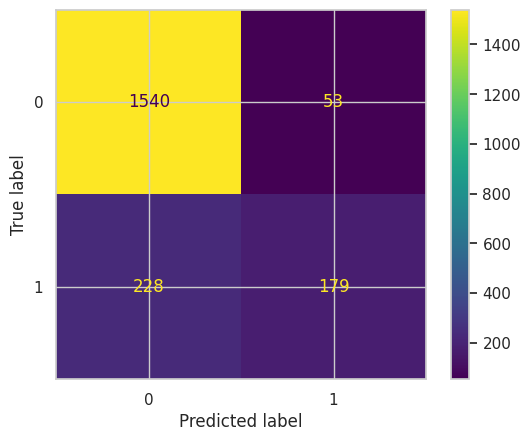

In [51]:
model_evaluation_metrics(random_model)

- Precision: The area where the predicted points are truly 1.
- Recall: How much of the area with actual 1s we predicted.
- F1 Score: The harmonic mean of precision and recall.
- Accuracy: The ratio of total correct predictions to the total number of data points.
- The need to download 227 might require further investigation. It could be related to specific data or models. Further research is recommended.
- The ROC-AUC score of 84 indicates how well the model can distinguish between the classes. Since we performed this analysis on the entire dataframe, these results seem quite successful.

insights

1.  This could be an indication of overfitting, where the model has learned the training data too well, capturing noise and specific patterns that may not generalize well to new, unseen data.
2.   This discrepancy could be an indication of overfitting or an imbalance in the dataset. Further analysis, such as cross-validation or exploring regularization techniques, may help address and mitigate overfitting issues.
3. We can use random oversampling or undersampling improving model.

In [52]:
def plotting_roc_curve(model):
  """
  Plotting roc curve to see classification success.

  """
  plt.figure(figsize=(8, 8))
  y_pred_prob=model.predict_proba(X_test)[:,1]
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
  plt.plot(fpr,tpr)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')

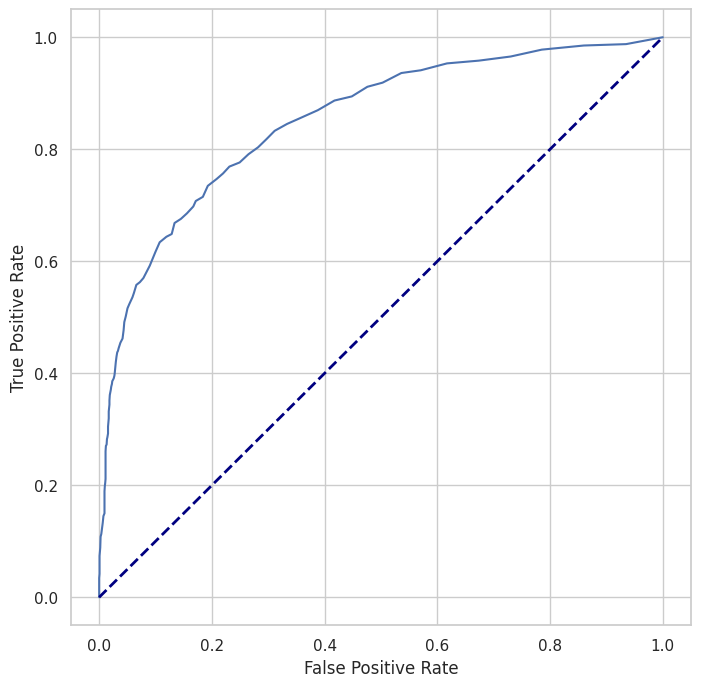

In [53]:
# calling roc_curve method
plotting_roc_curve(random_model)

- AUC provides a summary measure of the model's ability to distinguish between positive and negative classes.
- A higher AUC value (closer to 1) indicates better discrimination ability.
- If there is a significant class imbalance, the ROC curve provides insights into how well the model is performing on both classes.

🌳🌳**Random forest feature importance**

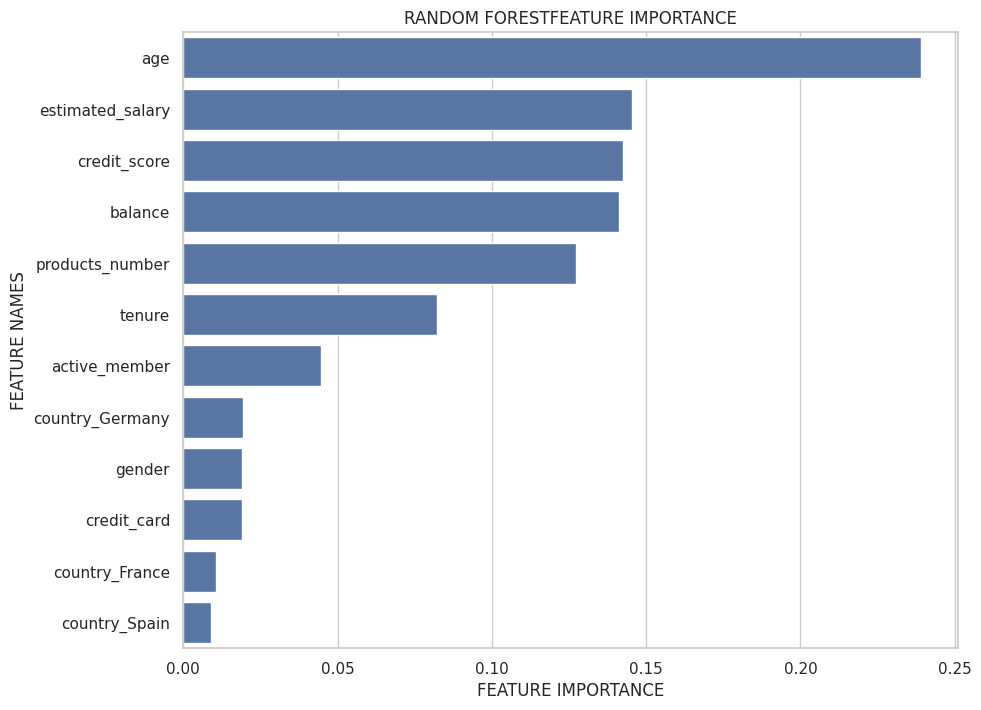

In [54]:
def plot_feature_importance(importance,names,model_type):

  """

   Plot the feature importance for a given model.

    Parameters:
    - importance (array-like): The importance values of each feature.
    - names (array-like): The names of the features.
    - model_type (str): The type of the model.

  """
  feature_importance = np.array(importance)
  feature_names = np.array(names)
  data={"feature_names":feature_names,"feature_importance":feature_importance}
  fi_df = pd.DataFrame(data)
  fi_df.sort_values(by=["feature_importance"], ascending=False,inplace=True)
  plt.figure(figsize=(10,8))
  sns.barplot(x=fi_df["feature_importance"], y=fi_df["feature_names"])
  plt.title(model_type + "FEATURE IMPORTANCE")
  plt.xlabel("FEATURE IMPORTANCE")
  plt.ylabel("FEATURE NAMES")

plot_feature_importance(random_model.feature_importances_,X.columns,"RANDOM FOREST")

In [55]:
# feature selection
selected_features = ["credit_score", "age", "balance", "products_number","estimated_salary","tenure","churn"]
feature_df = df[selected_features]

In [57]:
feature_df.head(2)

,credit_score,age,balance,products_number,estimated_salary,tenure,churn
0,619,42,0.00,1,101348.88,2,1
1,608,41,83807.86,1,112542.58,1,0




```
adding new feature to dataframe
```



In [58]:
def plot_churn_by_credit_score(dataframe, bins=[0, 350, 450, 550, 650, 750, 850]):
    """
    Plots the churn probability based on credit score groups.

    Parameters:
    - dataframe (pd.DataFrame): DataFrame containing the data.
    - bins (list): List of bin edges for credit score groups.

    """
    df_copy = dataframe.copy()

    df_copy["credit_score_group"] = pd.cut(dataframe["credit_score"], bins=bins,
                                            labels=["Very Poor", "Mid Poor", "Poor", "Fair", "Good", "Excellent"])

    churn_rate_by_group = df_copy.groupby("credit_score_group")['churn'].mean().reset_index()
    plt.figure(figsize=(6, 4))
    sns.barplot(x='credit_score_group', y='churn', data=churn_rate_by_group,hue="credit_score_group",legend = False , palette="Set2")
    plt.title('Churn Probability by Credit Score')
    plt.xlabel('Credit Score Group')
    plt.ylabel('Churn')
    plt.show()
    return df_copy

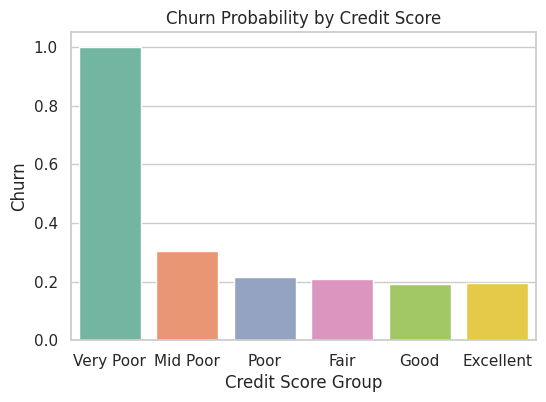

In [59]:
feature_df  = plot_churn_by_credit_score(feature_df)

- acording to credit score churn is very important for this

### creating new model with new features :)


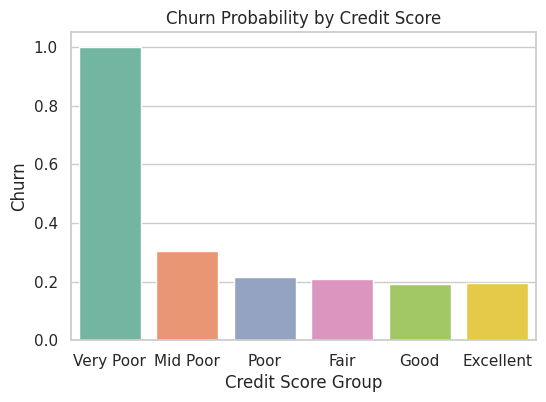

**********
training scores
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      1630

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

tesitng scores
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.76      0.44      0.56       407

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000

************
roc_auc_score: 0.8495128410382647
************
Confuison Matrix
[[1535   58]
 [ 228  179]]
************


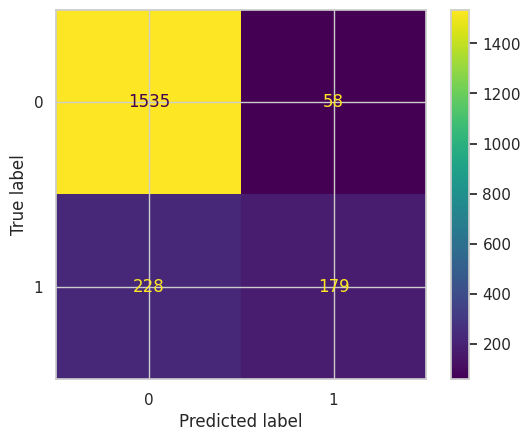

In [60]:
adding_cat_to_df = feature_df.copy()
def creating_model_with_new_features(adding_cat_to_df):
  """

  Create a new model by adding a categorical feature to the dataset.

    Parameters:
    - adding_cat_to_df (DataFrame): The dataset with additional categorical features.

    Returns:
    - new_added_model: The new model trained with the modified dataset.
    - adding_cat_to_df: The modified dataset with added categorical features.
    - X_train, X_test, y_train, y_test: Train and test sets for the model.
    - X, y: Features and target variable for the dataset.
  """
  adding_cat_to_df = plot_churn_by_credit_score(adding_cat_to_df)
  cat=["credit_score_group"]
  adding_cat_to_df =one_hot_encoder(adding_cat_to_df,cat,drop_first=True)
  X,y = data_split(adding_cat_to_df)
  X, X_train, X_test, y_train, y_test,y = preprocess_workflow(adding_cat_to_df)
  new_added_model=random_forest_model()
  model_evaluation_metrics(new_added_model)
  return new_added_model,adding_cat_to_df,X_train,X_test,y_test,y_train,X,y
new_added_mdoel,adding_cat_to_df,X_train,X_test,y_test,y_train,X,y = creating_model_with_new_features(adding_cat_to_df)


Training score is should be overfittign all scores are 1
we have to improve our model if we add this feature.

In [61]:
adding_cat_to_df.head(1)

,credit_score,age,balance,products_number,estimated_salary,tenure,churn,credit_score_group_Mid Poor,credit_score_group_Poor,credit_score_group_Fair,credit_score_group_Good,credit_score_group_Excellent
0,619,42,0.0,1,101348.88,2,1,0,0,1,0,0


insights:
We added too much feature to our dataframe we had better not to use columns.

# Creating more than one models in the same way

In [62]:
# creating base models

In [63]:
def base_models(X, y, scoring="accuracy"):
    """
    Base models gives us accuracy with all models
    """
    print("Base Models....")
    models = [('LR', LogisticRegression()),
                   ('KNN', KNeighborsClassifier()),
                   ("SVC", SVC()),
                   ("DT", DecisionTreeClassifier()),
                   ("RF", RandomForestClassifier()),
                   ('GBM', GradientBoostingClassifier())

                   ]

    for name, classifier in models:
        cv_results = model_selection.cross_validate(classifier, X, y, cv=3, scoring=scoring)
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name}) ")

base_models(X, y, scoring="accuracy")

Base Models....
accuracy: 0.7946 (LR) 
accuracy: 0.7603 (KNN) 
accuracy: 0.7963 (SVC) 
accuracy: 0.7562 (DT) 
accuracy: 0.8344 (RF) 
accuracy: 0.8419 (GBM) 


- The result we found using only the deafult parameters of the model. Actually, we did a good job by choosing random forest in the first place, now let's think about how we can improve.

In [66]:
def gbm_production_model(dataframe,learning_rate=0.1,max_depth=3,min_samples_split=2,n_estimators=100):
  dataframe = dataframe.select_dtypes(["int","float"])
  """
  Create and evaluate a Gradient Boosting Machine (GBM) model for production using specified parameters.

    Parameters:
    - dataframe (DataFrame): The dataset for model training and evaluation.
   Returns:
    - GradientBoostingClassifier: The GBM production model.
    - DataFrame: Features of the training set.
    - DataFrame: Features of the testing set.
    - Series: Labels of the training set.
    - Series: Labels of the testing set.
    - Series: All labels.
    - Series: Predicted labels on the testing set.
  """
  X,y = data_split(dataframe)
  X,X_train,X_test,y_train,y_test,y = preprocess_workflow(dataframe)
  production_model = GradientBoostingClassifier(learning_rate=learning_rate,max_depth=max_depth,min_samples_split=min_samples_split,n_estimators = n_estimators)
  production_model.fit(X_train,y_train)
  y_pred = production_model.predict(X_test)
  return production_model,X_train,X_test,y_train,y_test,X,y,y_pred

In [67]:
production_model,X_train,X_test,y_train,y_test,X,y,y_pred = gbm_production_model(feature_df)

# Model Tuning

In [69]:
knn_params = {"n_neighbors": range(2, 50)}

cart_params = {'max_depth': range(1, 20),
               "min_samples_split": range(2, 30)}

rf_params = {"max_depth": [8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [15, 20],
             "n_estimators": [200, 300]}


gbm_params = {"learning_rate": [0.01, 0.1, 0.2],
              "n_estimators": [100, 200, 300],
              "max_depth": [3, 5, 7],
              "min_samples_split": [2, 5, 10]}

models = [("KNN", KNeighborsClassifier(), knn_params),
          ("CART",DecisionTreeClassifier(), cart_params),
          ("RF",  RandomForestClassifier(), rf_params),
          ("GBM", GradientBoostingClassifier(), gbm_params)]


## our model evaluation

**********
training scores
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      6370
           1       0.73      0.46      0.56      1630

    accuracy                           0.85      8000
   macro avg       0.80      0.71      0.74      8000
weighted avg       0.84      0.85      0.84      8000

tesitng scores
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      1593
           1       0.69      0.40      0.51       407

    accuracy                           0.84      2000
   macro avg       0.77      0.68      0.71      2000
weighted avg       0.83      0.84      0.82      2000

************
roc_auc_score: 0.8289514475955153
************
Confuison Matrix
[[1518   75]
 [ 243  164]]
************


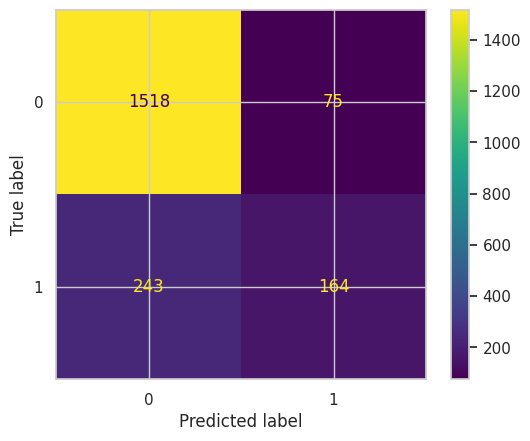

In [183]:
model_evaluation_metrics(production_model)

Choosing parameter always important to model.We arranged range of parameters

#This will take approximatley 20 minutes keep going never give up



---




In [70]:
def hyperparameter_optimization(X, y, cv=3, scoring="roc_auc"):
    print("Hyperparameter Optimization....")
    """


    Hyperparameter Optimization for a set of classifiers.

    Parameters:
    - X: Features
    - y: Target variable
    - cv: Number of cross-validation folds (default=3)
    - scoring: Scoring metric for optimization (default="roc_auc")
    """

    best_models = {}
    for name, classifier, params in models:
        print(f"########## {name} ##########")
        cv_results = model_selection.cross_validate(classifier, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")

        gs_best = model_selection.GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X, y)
        final_model = classifier.set_params(**gs_best.best_params_)

        cv_results = model_selection.cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After): {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models

best_models = hyperparameter_optimization(X, y)

Hyperparameter Optimization....
########## KNN ##########
roc_auc (Before): 0.5246
roc_auc (After): 0.5598
KNN best params: {'n_neighbors': 43}

########## CART ##########
roc_auc (Before): 0.6359
roc_auc (After): 0.8196
CART best params: {'max_depth': 5, 'min_samples_split': 2}

########## RF ##########
roc_auc (Before): 0.807
roc_auc (After): 0.8309
RF best params: {'max_depth': 8, 'max_features': 'auto', 'min_samples_split': 20, 'n_estimators': 300}

########## GBM ##########
roc_auc (Before): 0.8285
roc_auc (After): 0.8305
GBM best params: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 300}



## Creating Final model

In [71]:
production_model,X_train,X_test,y_train,y_test,X,y,y_pred = gbm_production_model(feature_df,learning_rate=0.01,max_depth=5,min_samples_split=10,n_estimators=300)

**********
training scores
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6370
           1       0.77      0.44      0.56      1630

    accuracy                           0.86      8000
   macro avg       0.82      0.70      0.74      8000
weighted avg       0.85      0.86      0.84      8000

tesitng scores
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1593
           1       0.71      0.37      0.48       407

    accuracy                           0.84      2000
   macro avg       0.78      0.66      0.69      2000
weighted avg       0.83      0.84      0.82      2000

************
roc_auc_score: 0.8262067923084873
************
Confuison Matrix
[[1532   61]
 [ 258  149]]
************


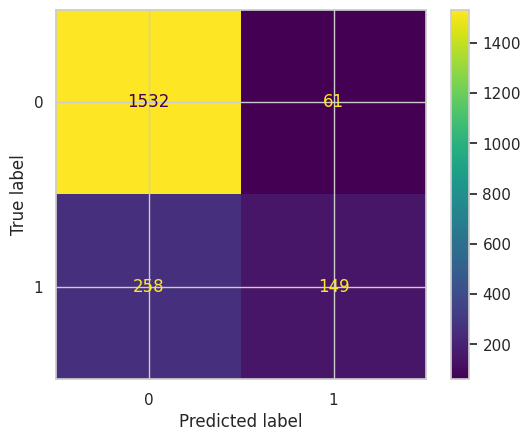

In [72]:
model_evaluation_metrics(production_model)

 - after feature selection as we can see training score is diffrent now! Our model can be used anymore.
- roc auc score actually same.

In [73]:
def gbm_production_model_with_random_oversampling(dataframe):
    """

    Apply Random Oversampling to balance the imbalanced dataset using the Gradient Boosting model.

    Parameters:
    - dataframe (pd.DataFrame): Imbalanced dataset.

    Returns:
    - GradientBoostingClassifier: Trained production model.

    """
    dataframe = dataframe.select_dtypes(["int", "float"])
    X, y = data_split(dataframe)
    X, X_train, X_test, y_train, y_test, y = preprocess_workflow(dataframe)
    print("label sayıları öncesi:", Counter(y_train))
    oversampler = RandomOverSampler(sampling_strategy='auto', random_state=818)
    X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)
    production_model = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100)
    print("label sayıları sonrası:", Counter(y_resampled))
    production_model.fit(X_resampled, y_resampled)
    y_pred = production_model.predict(X_test)
    return production_model


In [74]:
oversampled_model = gbm_production_model_with_random_oversampling(feature_df)

label sayıları öncesi: Counter({0: 6370, 1: 1630})
label sayıları sonrası: Counter({1: 6370, 0: 6370})


**********
training scores
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      6370
           1       0.49      0.75      0.59      1630

    accuracy                           0.79      8000
   macro avg       0.71      0.77      0.73      8000
weighted avg       0.84      0.79      0.81      8000

tesitng scores
              precision    recall  f1-score   support

           0       0.91      0.79      0.85      1593
           1       0.46      0.69      0.56       407

    accuracy                           0.77      2000
   macro avg       0.69      0.74      0.70      2000
weighted avg       0.82      0.77      0.79      2000

************
roc_auc_score: 0.8285573709302523
************
Confuison Matrix
[[1266  327]
 [ 125  282]]
************


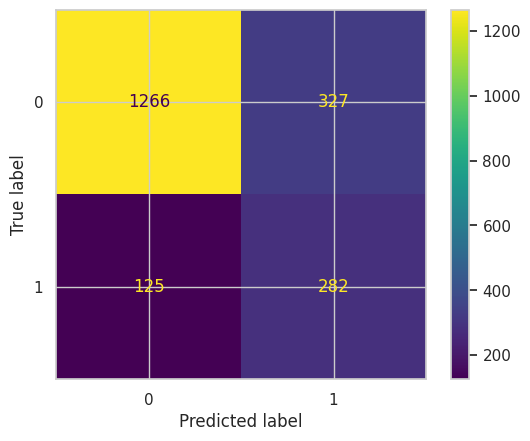

In [75]:
model_evaluation_metrics(oversampled_model)

> Model accuray is more higher between then and now.
roc_auc is same that means our model is well .

# Exporting and saving models

In [76]:
joblib.dump(production_model, 'gbm_model_production.joblib')

['gbm_model_production.joblib']

In [77]:
loaded_model = joblib.load('model/gbm_model_production.joblib')

# Predicitons

In [78]:
new_data=[600, 19, 1000.0, 1,10000,2] #example inputs
new_=np.array(new_data).reshape(1,-1)

In [79]:
prediction_gbm_model=loaded_model.predict(new_)
prediction_gbm_model[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


0

# Creating new model

In [81]:
balanced_df = df.copy()
balanced_df.loc[(balanced_df["balance"] == 0) & (balanced_df["active_member"] == 0), "churn"] = 1

>If customers have a balance amount of 0 and are not active members, these customers might have churned from the bank.

In [82]:
new_feature_df = balanced_df[selected_features]

> A person who has not any balance amount in the bank but still staying.
That may be visual churn.

In [83]:
def model_after_balance_set(dataframe):
  """
  This method provided if balance 0 is churn 1.
  - parameters :
    dataframe (pd.DataFrame): The name of the data you can use.
  """
  dataframe = dataframe.select_dtypes(["int", "float"])
  X,y = data_split(dataframe)
  X,X_train,X_test,y_train,y_test,y = preprocess_workflow(dataframe)
  production_model = GradientBoostingClassifier(learning_rate=0.1,max_depth=3,min_samples_split=2,n_estimators=100)
  production_model.fit(X_train,y_train)
  y_pred = production_model.predict(X_test)
  return production_model


In [84]:
balance_set_gbm_model = model_after_balance_set(new_feature_df)

**********
training scores
              precision    recall  f1-score   support

           0       0.86      0.75      0.80      6370
           1       0.35      0.53      0.42      1630

    accuracy                           0.71      8000
   macro avg       0.61      0.64      0.61      8000
weighted avg       0.76      0.71      0.73      8000

tesitng scores
              precision    recall  f1-score   support

           0       0.86      0.75      0.80      1593
           1       0.35      0.51      0.41       407

    accuracy                           0.70      2000
   macro avg       0.60      0.63      0.61      2000
weighted avg       0.75      0.70      0.72      2000

************
roc_auc_score: 0.7126810940370263
************
Confuison Matrix
[[1202  391]
 [ 200  207]]
************


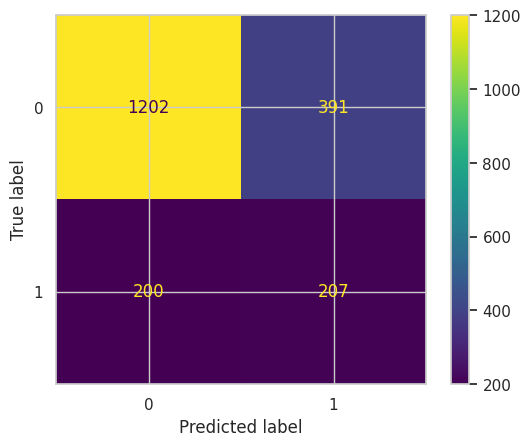

In [85]:
model_evaluation_metrics(balance_set_gbm_model)

We can look roc_auc and general accuracy as well .we can't use this model.

insights:
- Collaborate with business stakeholders to gain deeper insights and update the understanding of customer behaviors.

### Clustering model for understanding customer behavior

### plotting count of cluster for best modeling

In [86]:
def plot_elbow_method(dataframe, max_clusters=11):
    distortions = []
    """

    Plot the Elbow Method to determine the optimal number of clusters using KMeans.

    Parameters:
    - dataframe (DataFrame): The input dataframe for clustering.
    - max_clusters (int): Maximum number of clusters to consider (default is 11).

    Returns:
    None (displays the Elbow Method plot)
    """

    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++',n_init=20, random_state=818)
        kmeans.fit(dataframe)
        distortions.append(kmeans.inertia_)

    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.show()

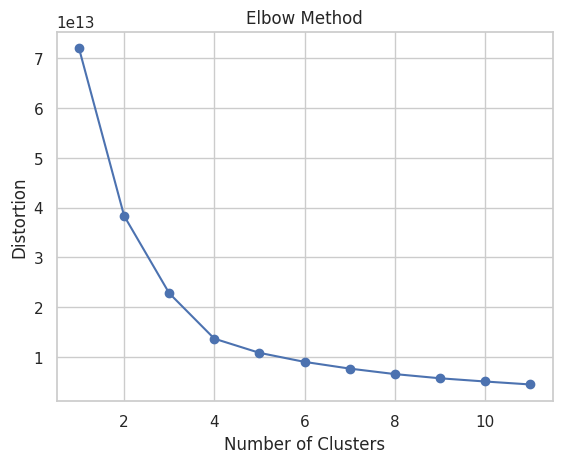

In [87]:
cluster_X = feature_df[selected_features]
plot_elbow_method(cluster_X)

Acording elbow plot 4 is best cluster

### This will take minutes acording to your dataframe.

In [88]:
def plot_dendrogram(dataframe):
    linked = linkage(dataframe, 'ward')
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title('Dendrogram')
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.show()

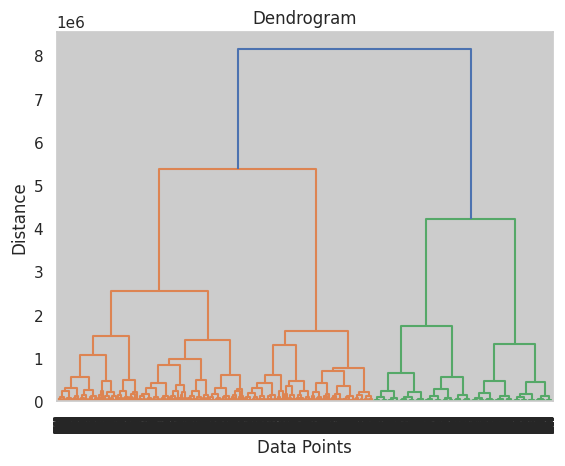

In [89]:
plot_dendrogram(cluster_X)

We choose 4 number

### creating cluster model

In [90]:
def kmeans_clustering(dataframe, number_of_cluster):
    """
     Fits a KMeans clustering model and predicts clusters for the given dataset.

    Parameters:
    - dataframe (pd.DataFrame): The name of the dataframe.
    - number_of_cluster (int): The name of the cluster you wanna use .

    Returns:
    - pd.DataFrame: New added labels dataframe
    """

    kmeans = KMeans(n_clusters=number_of_cluster, init='k-means++',n_init=20 ,random_state=818)

    clusters = kmeans.fit(dataframe)
    new_labels = clusters.labels_
    data_with_clusters = dataframe.copy()
    data_with_clusters["cluster"] = new_labels

    return data_with_clusters

In [91]:
data_with_clusters= kmeans_clustering(cluster_X,4)

With best cluster parameters call the model again

### some analysis for new model

In [92]:
data_with_clusters[:2]

,credit_score,age,balance,products_number,estimated_salary,tenure,churn,cluster
0,619,42,0.00,1,101348.88,2,1,3
1,608,41,83807.86,1,112542.58,1,0,1


In [93]:
data_with_clusters.cluster.value_counts()

1    3132
0    3065
2    1914
3    1889
Name: cluster, dtype: int64

## Plotting visualizaitons

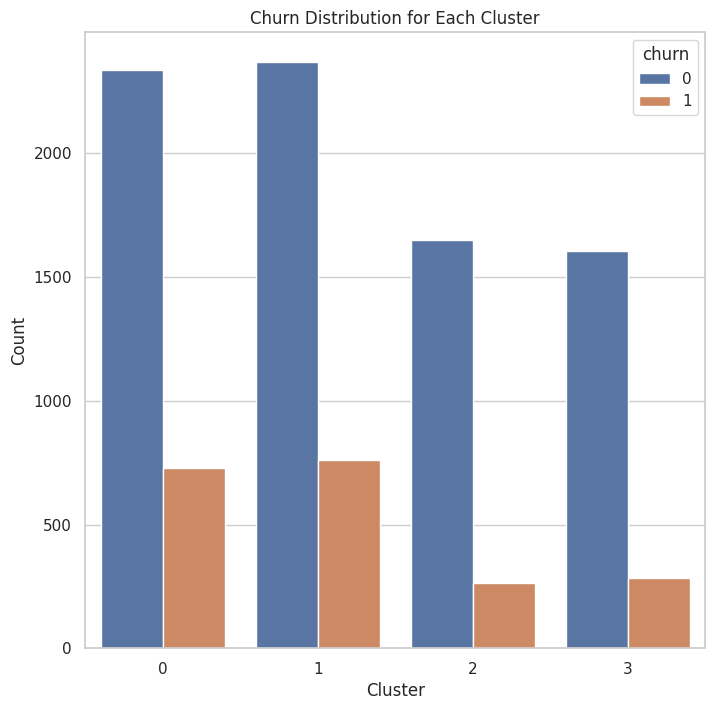

In [94]:
plt.figure(figsize=(8, 8))
sns.countplot(x='cluster', hue="churn", data=data_with_clusters)
plt.title('Churn Distribution for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

0 and 1 cluters important for churn behaviour.

## Plotting churn rate for each features

In [95]:
cluster_stats = data_with_clusters.groupby('cluster').agg({
    'credit_score': 'mean',
    'age': 'mean',
    'balance': 'mean',
    'products_number': 'mean',
    'estimated_salary': 'mean',
    'tenure': 'mean',
    'churn':'mean'}).reset_index()

In [96]:
def visualize_cluster_with_churn(dataframe, cluster_column, features, churn_column):



    """
    Visualize the mean values of specified features and churn status for each cluster using bar plots.

    Parameters:
    - dataframe: (pd.DataFrame), the name of the data.
    - cluster_column: str, the name of the column containing clustering information.
    - features: list, names of features to be visualized.
    - churn_column: str, the name of the column containing churn status.

    """
    for feature in features:
        plt.figure(figsize=(8, 6))
        sns.barplot(x=cluster_column, y=feature, hue=churn_column, data=dataframe)
        plt.title(f'Mean {feature} for Each Cluster')
        plt.xlabel('Cluster')
        plt.ylabel(f'Mean {feature}')
        plt.show()


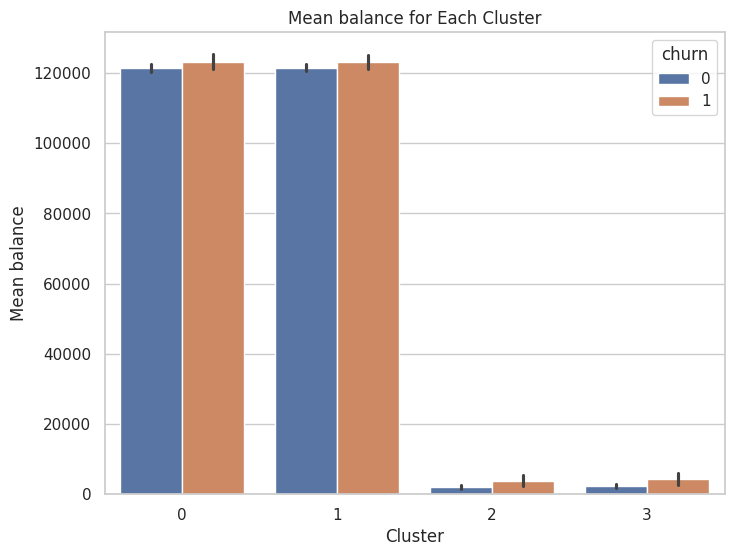

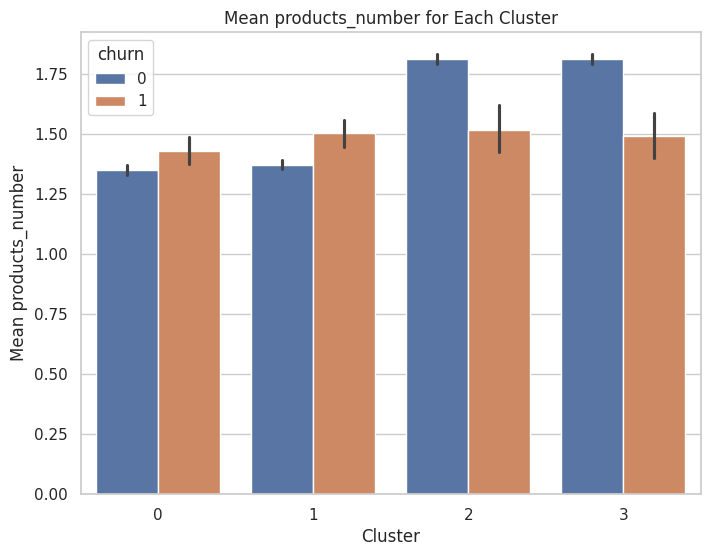

In [97]:
visualize_cluster_with_churn(data_with_clusters,"cluster",["balance","products_number"],"churn")

0 and 1 cluster have higher mean balance this is important for churn




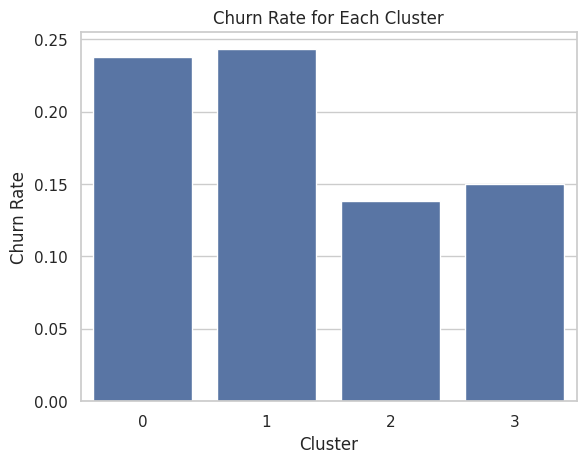

In [99]:
sns.barplot(x='cluster', y='churn', data=cluster_stats)
plt.title('Churn Rate for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Churn Rate')
plt.show()

- Customers in clusters 0 and 1 tend to have fewer products (product_number) compared to other clusters, indicating a lower level of engagement with the bank. To increase customer loyalty, targeted campaigns can be organized for customers in these clusters.

- Customers in clusters 2 and 3 have lower balances in the bank compared to other clusters. To address this, personalized strategies and offerings can be designed to encourage these customers to increase their account balances.